In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('amz_uk_price_prediction_dataset.csv')
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [2]:
crosstab = pd.crosstab(df['category'], df['isBestSeller'], normalize='index') * 100
crosstab_sorted = crosstab.sort_values(True, ascending=False)

In [4]:
from scipy.stats import chi2_contingency
import numpy as np

table = pd.crosstab(df['category'], df['isBestSeller'])
chi2, p, dof, expected = chi2_contingency(table)

n = table.sum().sum()
phi2 = chi2 / n
r, k = table.shape
cramers_v = np.sqrt(phi2 / min(k-1, r-1))

print(f"Chi² = {chi2:.2f}, p = {p:.4f}, Cramér's V = {cramers_v:.3f}")

Chi² = 36540.20, p = 0.0000, Cramér's V = 0.122


Text(0.5, 1.0, 'Distribution bestseller by category')

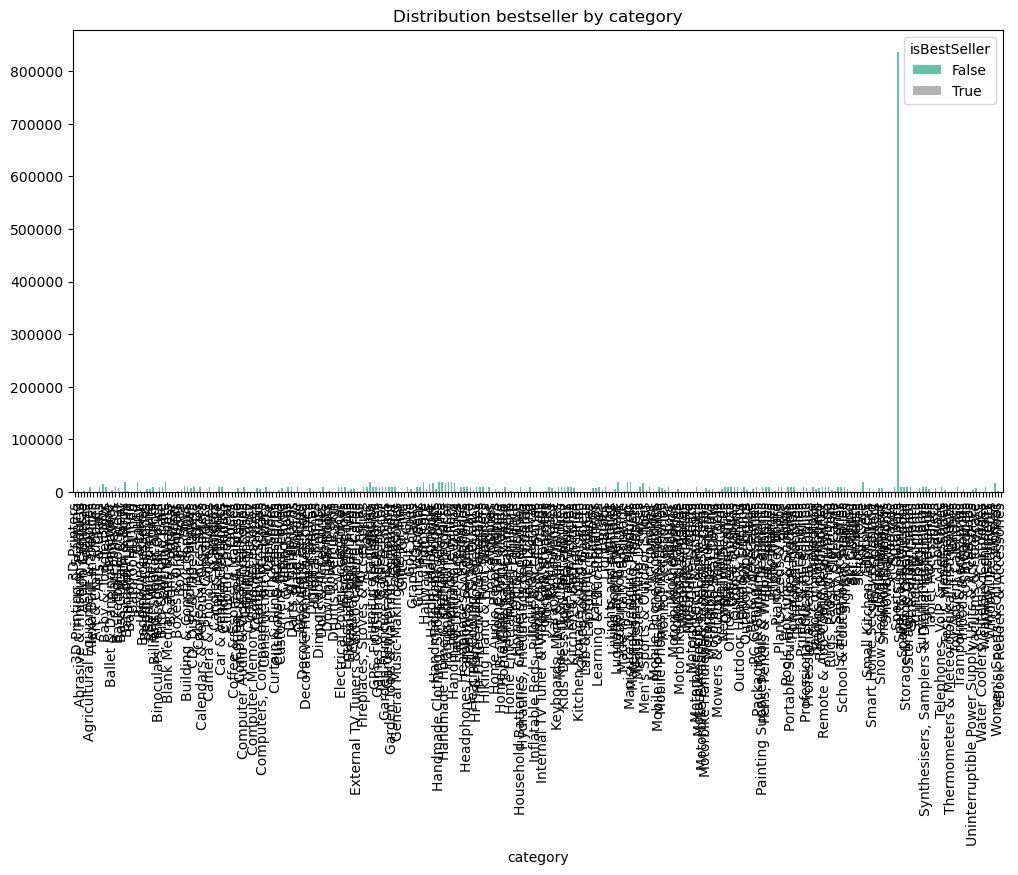

In [5]:
table.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
plt.title("Distribution bestseller by category")


In [6]:
# Delete the outliners
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_no_outliers = df[(df['price'] >= lower) & (df['price'] <= upper)]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Handmade Home & Kitchen Products'),
  Text(1, 0, 'Sports & Outdoors'),
  Text(2, 0, 'Handmade Gifts'),
  Text(3, 0, 'Fragrances'),
  Text(4, 0, 'Skin Care'),
  Text(5, 0, 'Birthday Gifts'),
  Text(6, 0, 'Handmade Kitchen & Dining'),
  Text(7, 0, 'Bath & Body'),
  Text(8, 0, 'Manicure & Pedicure Products'),
  Text(9, 0, 'Beauty'),
  Text(10, 0, 'Handmade Artwork'),
  Text(11, 0, 'Make-up'),
  Text(12, 0, 'Baby'),
  Text(13, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(14, 0, 'Handmade Home Décor'),
  Text(15, 0, 'Men'),
  Text(16, 0, 'Luggage and travel gear'),
  Text(17, 0, 'Handmade Jewellery'),
  Text(18, 0, 'Women'),
  Text(19, 0, 'Hair Care')])

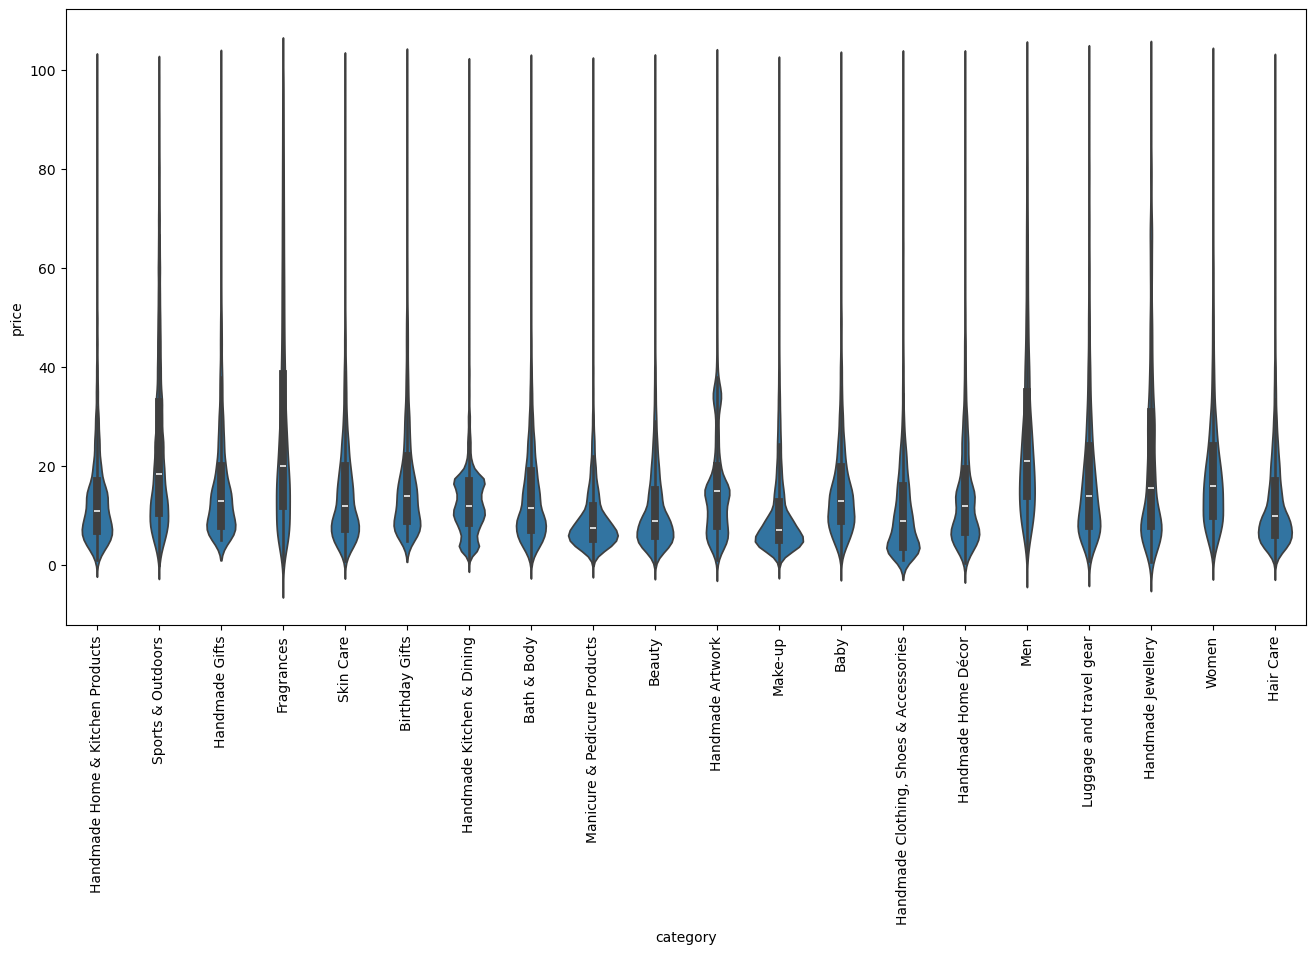

In [7]:
import seaborn as sns

top20 = df_no_outliers['category'].value_counts().nlargest(20).index
plt.figure(figsize=(16,8))
sns.violinplot(data=df_no_outliers[df_no_outliers['category'].isin(top20)],
               x='category', y='price')
plt.xticks(rotation=90)

Text(0, 0.5, 'average price (£)')

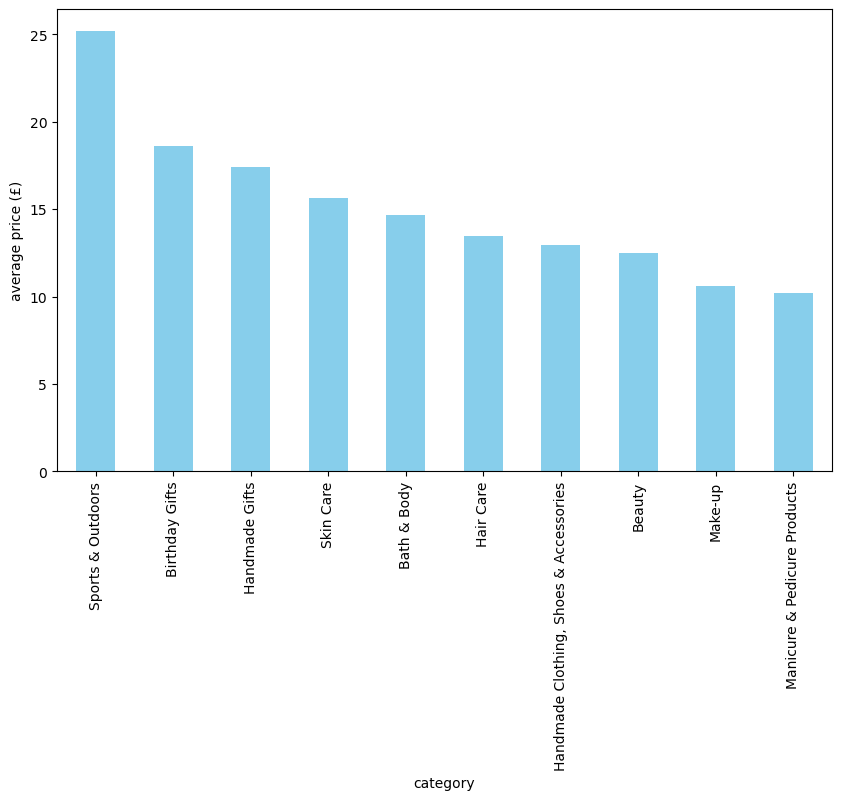

In [8]:
top10 = df_no_outliers['category'].value_counts().nlargest(10).index
avg_price = df_no_outliers[df_no_outliers['category'].isin(top10)].groupby('category')['price'].mean().sort_values(ascending=False)

avg_price.plot(kind='bar', color='skyblue', figsize=(10,6))
plt.ylabel("average price (£)")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Fragrances'),
  Text(2, 0, 'Skin Care'),
  Text(3, 0, 'Birthday Gifts'),
  Text(4, 0, 'Bath & Body'),
  Text(5, 0, 'Manicure & Pedicure Products'),
  Text(6, 0, 'Beauty'),
  Text(7, 0, 'Make-up'),
  Text(8, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(9, 0, 'Hair Care')])

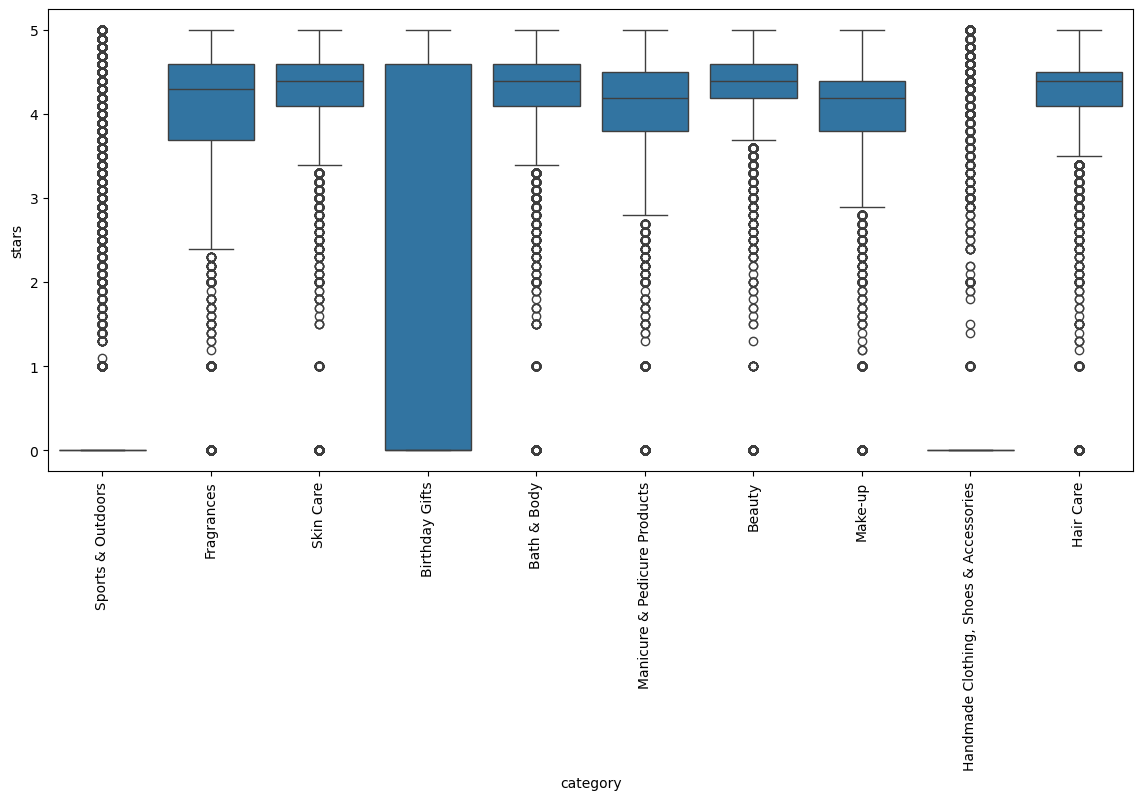

In [9]:
top10 = df['category'].value_counts().nlargest(10).index
plt.figure(figsize=(14,6))
sns.boxplot(data=df[df['category'].isin(top10)], x='category', y='stars')
plt.xticks(rotation=90)

In [10]:
correlation = df[['price', 'stars']].corr().loc['price', 'stars']
print(f"Correlation price-rating: {correlation:.3f}")

Correlation price-rating: -0.125


Text(0.5, 1.0, 'Relationship between price and rate')

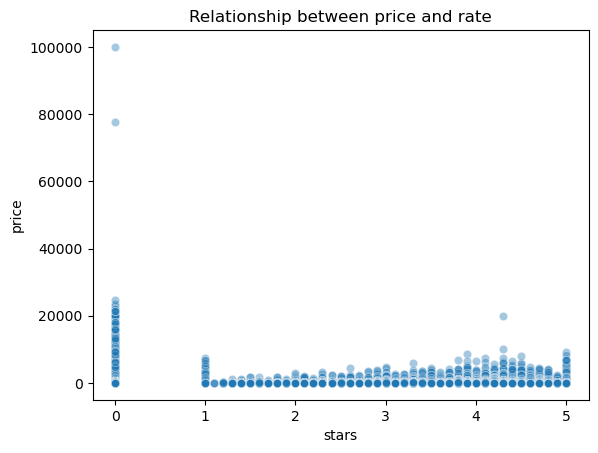

In [11]:
sns.scatterplot(data=df, x='stars', y='price', alpha=0.4)
plt.title("Relationship between price and rate")

<Axes: >

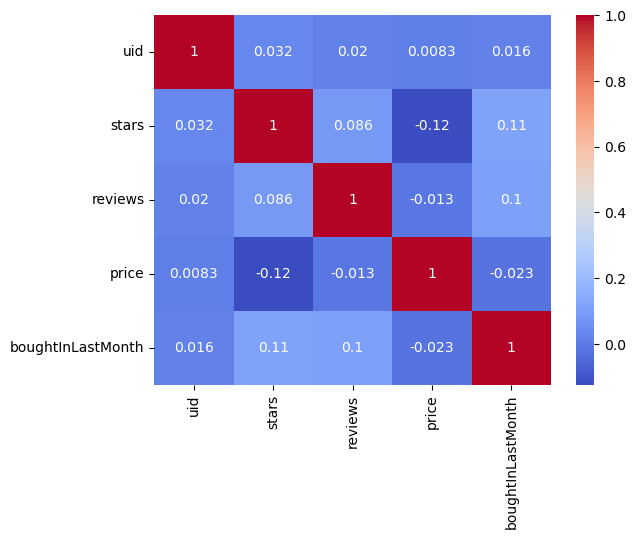

In [12]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')

Text(0.5, 1.0, 'QQ Plot for price')

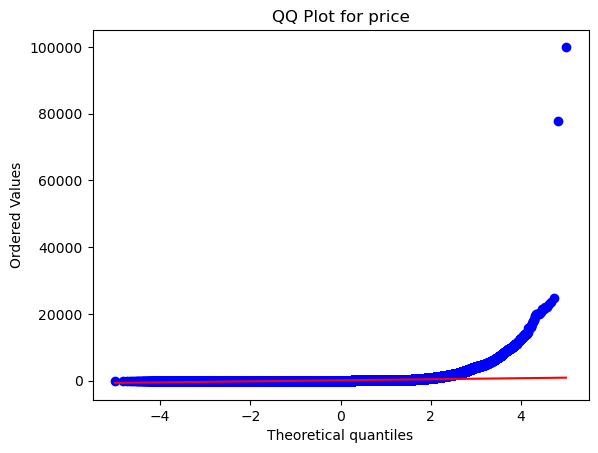

In [13]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(df['price'], dist="norm", plot=plt)
plt.title("QQ Plot for price")